In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML


In [3]:
t=pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/pareto_low_adv.csv')

In [4]:
t

,complexity,loss,score,equation,sympy_format,lambda_format,number_constants,variables,number_variables,unique_number_variables,evolutions,iterations
0,1,2.422899,0.000000,x66,x66,PySRFunction(X=>x66),0,{'x66'},1,1,0,0
1,3,0.793023,0.558434,(x73 - -8.377161567514106),x73 + 8.377161567514106,PySRFunction(X=>x73 + 8.377161567514106),1,{'x73'},1,1,0,0
2,5,0.206301,0.673258,((x66 + -0.9436089623410584) + x25),x25 + x66 - 0.9436089623410584,PySRFunction(X=>x25 + x66 - 0.9436089623410584),1,"{'x66', 'x25'}",2,2,0,0
3,7,0.205954,0.000842,((x66 + (-0.9436089623410584 + 0.0105148740036...,x25 + x66 - 0.93309408833744097,PySRFunction(X=>x25 + x66 - 0.93309408833744097),2,"{'x66', 'x25'}",2,2,0,0
4,9,0.129766,0.230959,(((0.45731312294876897 - (x42 * 0.556125855339...,-0.5561258553397066*x42 + x53 + x69 + 0.457313...,PySRFunction(X=>-0.5561258553397066*x42 + x53 ...,2,"{'x53', 'x69', 'x42'}",3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
349553,11,0.023992,0.075471,((x15 / 0.2668874742027646) - ((x51 - x42) / (...,3.746897463011928*x15 - (-x42 + x51)/(x9 - 2.5...,PySRFunction(X=>3.746897463011928*x15 - (-x42 ...,2,"{'x9', 'x42', 'x51', 'x15'}",4,4,4,4999
349554,12,0.014401,0.510440,(((x15 / 0.31852133710431946) + ((x39 - x42) /...,3.1395071020704912*x15 + (x39 - x42)*exp(-x19)...,PySRFunction(X=>3.1395071020704912*x15 + (x39 ...,2,"{'x19', 'x42', 'x15', 'x39'}",4,4,4,4999
349555,14,0.013066,0.048638,((((x15 / 0.31852133710431946) + 0.99187526474...,3.1395071020704912*x15 + (x39 - x42)*exp(-x19)...,PySRFunction(X=>3.1395071020704912*x15 + (x39 ...,3,"{'x19', 'x42', 'x15', 'x39'}",4,4,4,4999
349556,16,0.012921,0.005578,((((x15 / 0.31789215380317404) + (0.9918752647...,0.9918752647456127**x39 + 3.1457209246477959*x...,PySRFunction(X=>0.9918752647456127**x39 + 3.14...,3,"{'x19', 'x42', 'x15', 'x39'}",5,4,4,4999


In [18]:
evolution=0

t=t[t['evolutions']==evolution]
niterations=t['iterations'].max()+1

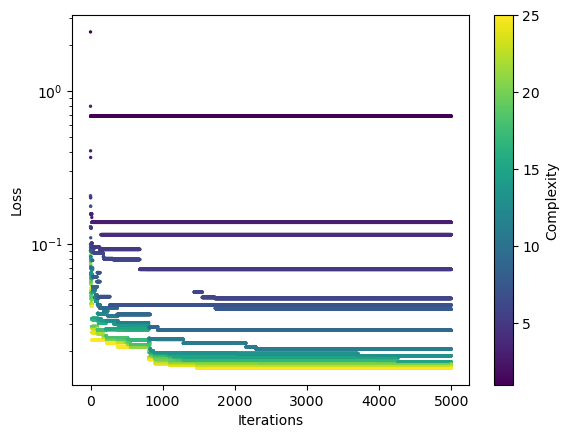

In [10]:
plt.scatter(t['iterations'],t['loss'],s=2,c=t['complexity'])
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.colorbar(label='Complexity')

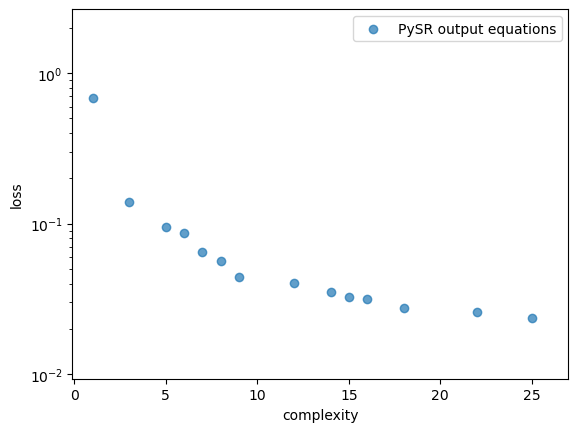

In [50]:
# plot the pareto front for each iteration
fig, ax = plt.subplots()
ax.set_xlabel('complexity')
ax.set_ylabel('loss')
ax.set_yscale('log')
ax.set_xlim(-0.1,27)
ax.set_ylim(t['loss'].min()*0.6,t['loss'].max()*1.1)

#colors = plt.cm.viridis(np.linspace(0,1,niterations))

i=99
t_i=t[t['iterations']==i]
ax.scatter(t_i['complexity'],t_i['loss'],alpha=0.7,label='PySR output equations'.format(i+1))
ax.legend()

#plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=niterations), cmap='viridis'), ax=ax, label='iteration')

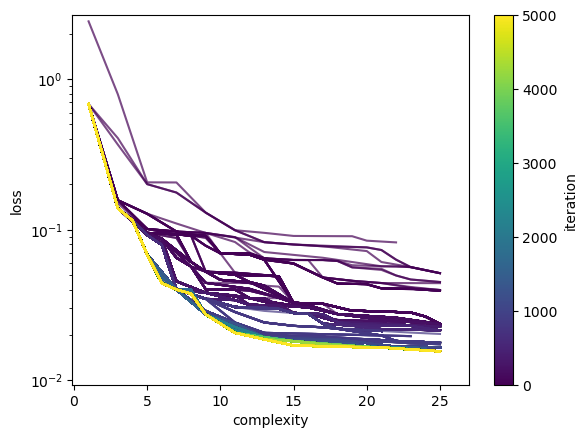

In [24]:
# plot the pareto front for each iteration
fig, ax = plt.subplots()
ax.set_xlabel('complexity')
ax.set_ylabel('loss')
ax.set_yscale('log')
ax.set_xlim(-0.1,27)
ax.set_ylim(t['loss'].min()*0.6,t['loss'].max()*1.1)

colors = plt.cm.viridis(np.linspace(0,1,niterations))

for i in range(niterations):
    t_i=t[t['iterations']==i]
    ax.plot(t_i['complexity'],t_i['loss'],color=colors[i],alpha=0.7)

plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=niterations), cmap='viridis'), ax=ax, label='iteration')

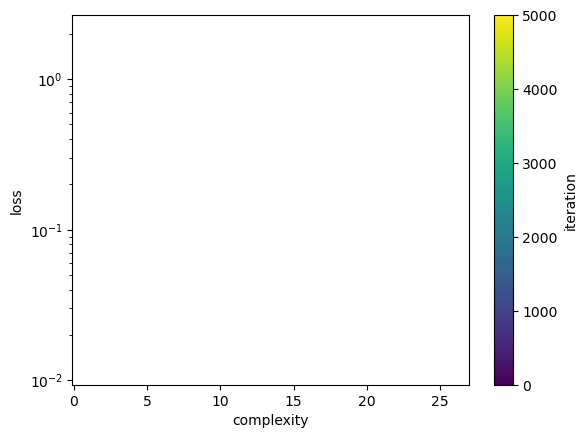

In [81]:
# animate the pareto front as iterations evolve.
fig, ax = plt.subplots()
ax.set_xlabel('complexity')
ax.set_ylabel('loss')
ax.set_yscale('log')
ax.set_xlim(-0.1,27)
ax.set_ylim(t['loss'].min()*0.6,t['loss'].max()*1.1)
plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=niterations), cmap='viridis'), ax=ax, label='iteration')

colors = plt.cm.viridis(np.linspace(0,1,niterations))

frames=np.append(np.append(np.arange(0,10),np.arange(10, niterations,10)),niterations-1)

def animate(i):
    t_i=t[t['iterations']==i]
    if i>0:
        t_ii=t[t['iterations']==frames[np.where(frames==i)[0][0]-1]]
        # remove previous iteration
        ax.lines[-1].remove()
        ax.plot(t_ii['complexity'],t_ii['loss'],color=colors[i-1],alpha=0.7,ls='--')
    # plot current iteration
    ax.plot(t_i['complexity'],t_i['loss'],color=colors[i],alpha=0.7)
        
    return ax

def init():
    
    return ax

#anim = FuncAnimation(fig, animate,init_func=init , frames=np.arange(0, niterations), interval=20)
#anim = FuncAnimation(fig, animate,init_func=init , frames=np.arange(0, niterations), interval=1000)
anim = FuncAnimation(fig, animate,init_func=init , frames=frames, interval=23.5)
#HTML(anim.to_html5_video())

In [76]:
12/len(frames)*1000

23.52941176470588

In [77]:
HTML(anim.to_html5_video())

In [82]:
anim.save('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/Blackhole_properties/Ultimate_paper/low_adv_evolution0.mp4', fps=len(frames)/12, codec='h264')

## BIC vs. number of free parameters

In [91]:
df_full = pd.read_csv('SMBH_Data_03_06_24.csv',header=1)

low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)',
       'GJC23log(SFR)','GJC23log(sSFR)','log<Sigma>_e','log<Sigma>_h','M_BH']

paras=low_scatter_para.copy()


if paras[-1]!='M_BH':
    paras.append('M_BH')
paras.append('M_BH_std_sym')

obs=df_full.copy()
obs = obs[paras].dropna(axis='index',how='any')
print(len(obs))

w = 1/obs['M_BH_std_sym'].to_numpy()**2

93


In [92]:
t=pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/pareto_low_adv.csv')
n_data=len(obs)

In [85]:
t

,complexity,loss,score,equation,sympy_format,lambda_format,number_constants,variables,number_variables,unique_number_variables,evolutions,iterations
0,1,2.422899,0.000000,x66,x66,PySRFunction(X=>x66),0,{'x66'},1,1,0,0
1,3,0.793023,0.558434,(x73 - -8.377161567514106),x73 + 8.377161567514106,PySRFunction(X=>x73 + 8.377161567514106),1,{'x73'},1,1,0,0
2,5,0.206301,0.673258,((x66 + -0.9436089623410584) + x25),x25 + x66 - 0.9436089623410584,PySRFunction(X=>x25 + x66 - 0.9436089623410584),1,"{'x66', 'x25'}",2,2,0,0
3,7,0.205954,0.000842,((x66 + (-0.9436089623410584 + 0.0105148740036...,x25 + x66 - 0.93309408833744097,PySRFunction(X=>x25 + x66 - 0.93309408833744097),2,"{'x66', 'x25'}",2,2,0,0
4,9,0.129766,0.230959,(((0.45731312294876897 - (x42 * 0.556125855339...,-0.5561258553397066*x42 + x53 + x69 + 0.457313...,PySRFunction(X=>-0.5561258553397066*x42 + x53 ...,2,"{'x53', 'x69', 'x42'}",3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
349553,11,0.023992,0.075471,((x15 / 0.2668874742027646) - ((x51 - x42) / (...,3.746897463011928*x15 - (-x42 + x51)/(x9 - 2.5...,PySRFunction(X=>3.746897463011928*x15 - (-x42 ...,2,"{'x9', 'x42', 'x51', 'x15'}",4,4,4,4999
349554,12,0.014401,0.510440,(((x15 / 0.31852133710431946) + ((x39 - x42) /...,3.1395071020704912*x15 + (x39 - x42)*exp(-x19)...,PySRFunction(X=>3.1395071020704912*x15 + (x39 ...,2,"{'x19', 'x42', 'x15', 'x39'}",4,4,4,4999
349555,14,0.013066,0.048638,((((x15 / 0.31852133710431946) + 0.99187526474...,3.1395071020704912*x15 + (x39 - x42)*exp(-x19)...,PySRFunction(X=>3.1395071020704912*x15 + (x39 ...,3,"{'x19', 'x42', 'x15', 'x39'}",4,4,4,4999
349556,16,0.012921,0.005578,((((x15 / 0.31789215380317404) + (0.9918752647...,0.9918752647456127**x39 + 3.1457209246477959*x...,PySRFunction(X=>0.9918752647456127**x39 + 3.14...,3,"{'x19', 'x42', 'x15', 'x39'}",5,4,4,4999


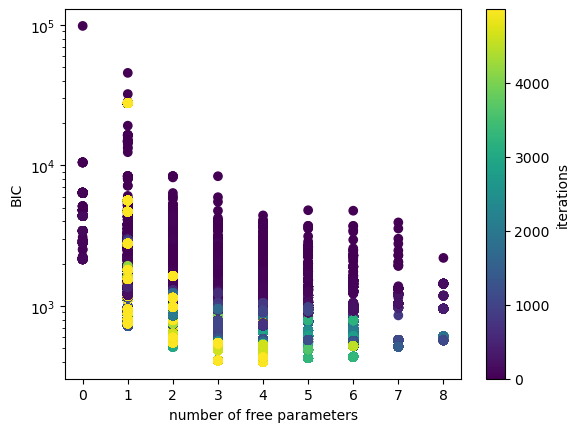

In [96]:
bic = t['loss']*w.sum()+np.log(n_data)*t['number_constants']
t['BIC']=bic
plt.scatter(t['number_constants'],bic,c=t['iterations'])
plt.xlabel('number of free parameters')
plt.ylabel('BIC')
#plt.ylim(0,400)
plt.yscale('log')
plt.colorbar().set_label('iterations')

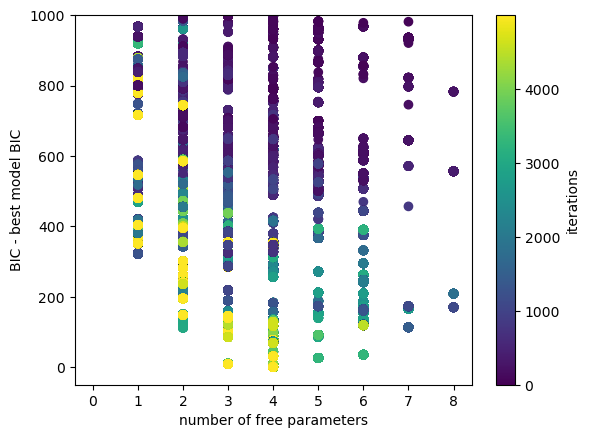

In [137]:
plt.scatter(t['number_constants'],t['BIC']-t['BIC'].min(),c=t['iterations'])
plt.xlabel('number of free parameters')
plt.ylabel('BIC - best model BIC')
plt.ylim(-50,1000)
#plt.yscale('log')
plt.colorbar().set_label('iterations')

## BIC vs. number of free parameters after inital refitting

In [103]:
filename = 'pareto_low_adv_cleaned.csv'
t_eq = pd.read_csv('/data/zj448/SR/Ultimate_paper/pareto_archive/'+filename[:-12]+'_refit.csv')

In [104]:
df_full = pd.read_csv('SMBH_Data_03_06_24.csv',header=1)

low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)',
       'GJC23log(SFR)','GJC23log(sSFR)','log<Sigma>_e','log<Sigma>_h','M_BH']

easy_obs_para=['LogSigma0','Concentration_Index','logSigma0sph','log_sigma0','dc','logRhphi','M*_sph','ube','bri25','bve','bvtc','logR10phi','M*_gal','log_B/T',
 'logRh','log_n_sph_eq','blum','log_R_e_sph_maj','logblum','log_n_sph_maj','logR10','Pseudobulge','AGN','Multiple','Ring','BCG','Disk','cD',
 'Bar','Core','Compactness','ETG','T-type','log10(R10_kpc)','log10(R90_kpc)','B-V','V-[3.6]','GJC23W1-W2','GJC23W2-W3','GJC23log(M*,gal/M_sun)','M_BH']

low_scatter_para.append('M_BH_std_sym')
easy_obs_para.append('M_BH_std_sym')

if 'low' in filename:
    df=df_full[low_scatter_para]
if 'easy' in filename:
    df=df_full[easy_obs_para]
df=df.dropna()
len(df)

93

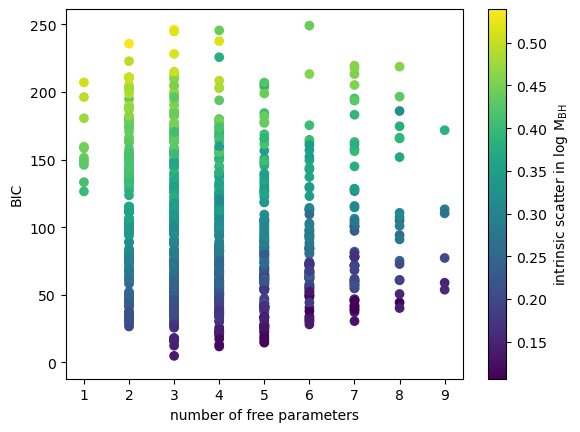

In [140]:
bic = -2*t_eq['LLL']+np.log(len(df))*(t_eq['number_constants']+1)
t_eq['BIC']=bic
t_plot=t_eq[t_eq['BIC']<250]
plt.scatter(t_plot['number_constants']+1,t_plot['BIC'],c=t_plot['intrinsic_scatter'])
plt.xlabel('number of free parameters')
plt.ylabel('BIC')
plt.ylim(-12,)
#plt.yscale('log')
plt.colorbar().set_label(r'intrinsic scatter in log $\text{M}_\text{BH}$')

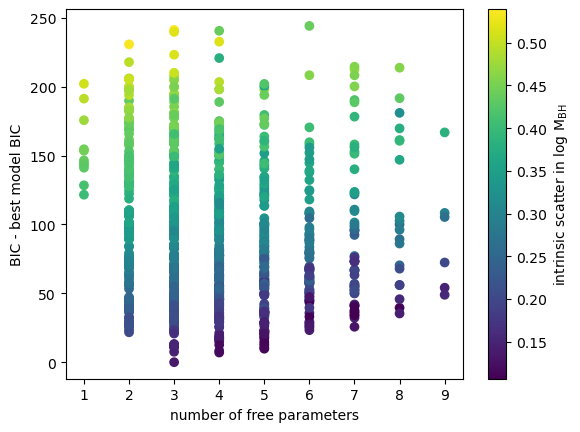

In [141]:
t_plot=t_eq[(t_eq['BIC']-t_eq['BIC'].min())<250]
plt.scatter(t_plot['number_constants']+1,t_plot['BIC']-t_plot['BIC'].min(),c=t_plot['intrinsic_scatter'])
plt.xlabel('number of free parameters')
plt.ylabel('BIC - best model BIC')
plt.ylim(-12,)
#plt.yscale('log')
plt.colorbar().set_label(r'intrinsic scatter in log $\text{M}_\text{BH}$')